In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('survey_results_public.csv')
df.set_index("ResponseId", inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89184 entries, 1 to 89184
Data columns (total 83 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Q120                                 89184 non-null  object 
 1   MainBranch                           89184 non-null  object 
 2   Age                                  89184 non-null  object 
 3   Employment                           87898 non-null  object 
 4   RemoteWork                           73810 non-null  object 
 5   CodingActivities                     73764 non-null  object 
 6   EdLevel                              87973 non-null  object 
 7   LearnCode                            87663 non-null  object 
 8   LearnCodeOnline                      70084 non-null  object 
 9   LearnCodeCoursesCert                 37076 non-null  object 
 10  YearsCode                            87435 non-null  object 
 11  YearsCodePro                     

(array([0.33, 1.33, 2.33, 3.33, 4.33, 5.33, 6.33, 7.33]),
 [Text(0.33, 0, '18-24 years old'),
  Text(1.33, 0, '25-34 years old'),
  Text(2.33, 0, '35-44 years old'),
  Text(3.33, 0, '45-54 years old'),
  Text(4.33, 0, '55-64 years old'),
  Text(5.33, 0, '65 years or older'),
  Text(6.33, 0, 'Prefer not to say'),
  Text(7.33, 0, 'Under 18 years old')])

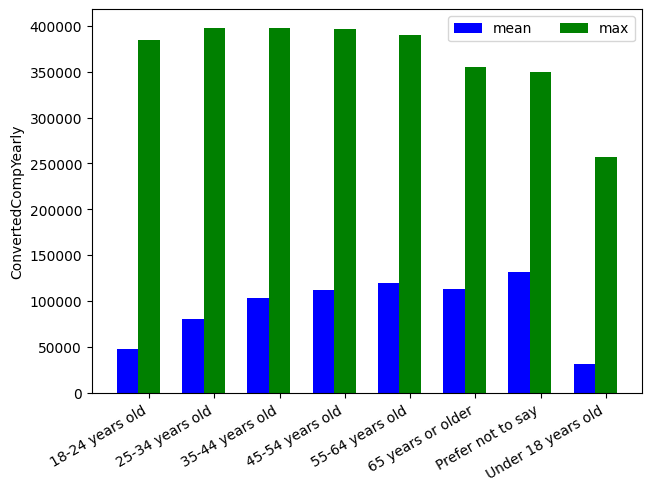

: 

In [55]:
filtered = df[df["ConvertedCompYearly"].isna() == False]
q_hi = filtered["ConvertedCompYearly"].quantile(0.99) #get the 99th percentile (outliers, probably data errors)
filtered = filtered[((filtered["ConvertedCompYearly"] < q_hi) & (filtered["ConvertedCompYearly"] > 0))]
grouped = filtered.groupby("Age")["ConvertedCompYearly"]

indexes = grouped.mean().index
bar_width = 0.33
x = np.arange(len(grouped.mean().index))
fig, ax = plt.subplots(layout='constrained')
bar = ax.bar(x, grouped.mean(), bar_width, color="blue", label="mean")
max_bar = ax.bar(x + bar_width, grouped.max(), bar_width, color="green", label="max")
ax.legend(ncols=2, loc="upper right")
ax.set_xticks(x + bar_width, indexes)
ax.set_ylabel('ConvertedCompYearly')
plt.xticks(rotation=30, ha="right")

In [ ]:
# pokaż najpopularnijesze języki programowania wg wieku
# pokaż technologie które są najbardziej popularne wśród osób w różnym wieku
# zarobki w zależności od wielkości firmy
# zarobki w zależności od doświadczenia (YearsCodePro/WorkExp)
# technologie/języki programowania które są wykorzystywane przy AI
# zarobki w zależności od Industry
# technologie używane w poszczególnych Industry
